In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/My Drive/projects/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/projects/test.csv')



In [ ]:
def stringToList(input):
  lst = []
  for i in input:
    l = list(map(float, i.split(" ")))
    lst.append(l)
  return lst

In [ ]:
x_train = data['pixels']
y_train = np.array(data['emotion'])

x_test = np.array(test_data['pixels'])

x_train = np.array(stringToList(x_train))/255.0
x_train = np.reshape(x_train, (28709, 48,48,1))
x_test = np.array(stringToList(x_test))
x_test = np.reshape(x_test, (7178,48,48,1)) /255.0
#y_train = np.reshape(y_train, (1,y_train.shape[0]))


# x_train = np.array(map(float, data['pixels']))
# x_train
# print(x_train.shape)
# type(x_train[0][])
# #x_train /= np.float(255)
# y_train = data['emotion']


In [ ]:
print(x_train.shape)

(28709, 48, 48, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization

In [ ]:
model = Sequential()
#1st convo
model.add(Conv2D(96, (3,3), input_shape = (48,48,1)))
model.add(Activation('relu'))
#polling
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


#2nd convo
model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
#polling
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


#3rd convo
model.add(Conv2D(384, (3,3)))
model.add(Activation('relu'))
#polling
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#4th convo
model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
#polling
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))





#passing through dense layer
model.add(Flatten())

#1st dense layer
model.add(Dense(1024))
model.add(Activation('relu'))
#dropout
model.add(BatchNormalization())
model.add(Dropout(0.4))


#2nd dense layer
model.add(Dense(1024))
model.add(Activation('relu'))
#dropout
model.add(BatchNormalization())
model.add(Dropout(0.4))


#3rd dense layer
model.add(Dense(256))
model.add(Activation('relu'))
#dropout
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Activation('relu'))


#output layer
model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ['sparse_categorical_accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1)



Epoch 1/10
808/808 [==============================] - 620s 766ms/step - loss: 2.0099 - sparse_categorical_accuracy: 0.2363 - val_loss: 1.5107 - val_sparse_categorical_accuracy: 0.3932
Epoch 2/10
808/808 [==============================] - 618s 765ms/step - loss: 1.4504 - sparse_categorical_accuracy: 0.4393 - val_loss: 1.3908 - val_sparse_categorical_accuracy: 0.4538
Epoch 3/10
808/808 [==============================] - 619s 766ms/step - loss: 1.2398 - sparse_categorical_accuracy: 0.5286 - val_loss: 1.4242 - val_sparse_categorical_accuracy: 0.4580
Epoch 4/10
808/808 [==============================] - 633s 784ms/step - loss: 1.1549 - sparse_categorical_accuracy: 0.5696 - val_loss: 1.6212 - val_sparse_categorical_accuracy: 0.4800
Epoch 5/10
808/808 [==============================] - 639s 791ms/step - loss: 1.0613 - sparse_categorical_accuracy: 0.6037 - val_loss: 1.3038 - val_sparse_categorical_accuracy: 0.4897
Epoch 6/10
808/808 [==============================] - 640s 793ms/step - loss: 0.

**saving the model**

In [ ]:
model.save('/content/drive/My Drive/projects/model.h5')

NameError: ignored

In [ ]:
from keras.models import load_model
loaded_model = load_model('/content/drive/My Drive/projects/model.h5')


In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 96)        960       
_________________________________________________________________
activation (Activation)      (None, 46, 46, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 256)       221440    
_________________________________________________________________
activation_1 (Activation)    (None, 21, 21, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 21, 21, 256)       1

In [ ]:
xz =np.reshape(x_test[65], (1,48,48,1))
xz.shape

x=loaded_model.predict(xz) > .5
print(x*100)



[[  0   0   0 100   0   0   0]]


**converting pixel to image**

(48, 48, 1)
(48, 48)


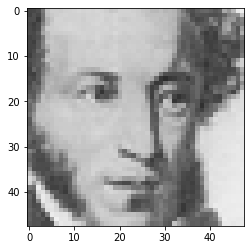

In [ ]:
import matplotlib.pyplot as plt

single_image = np.array(x_test[69]*255)
print(single_image.shape)
single_image = np.reshape(single_image,(48,48),order = 'C')
print(single_image.shape)
plt.imshow(single_image, cmap='gray', vmin=0, vmax=255)
# s_img = np.array(single_image, shape=(48,48))


In [ ]:
def shapechange(x):
  x = np.array(x);
  input = np.reshape(x, (48, 48, 1))
  return input
x = shapechange(test_data[1])
print(x)

KeyError: ignored